### Introduction

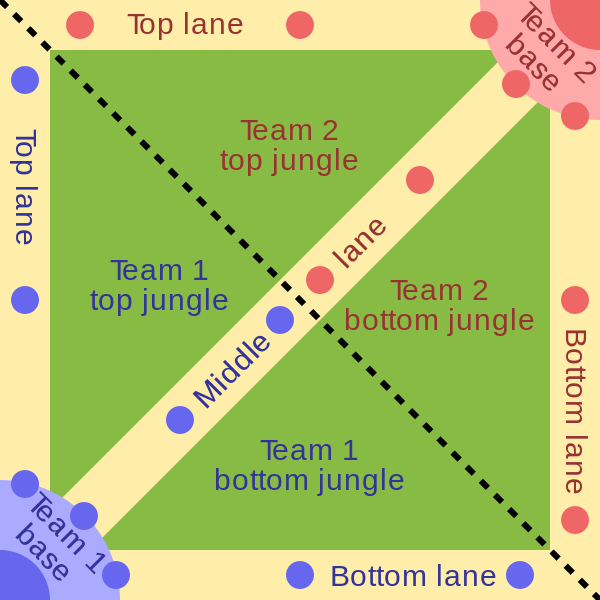
We’ve both played League of Legends (LOL) for quite some time, Danny played it since 2013, and Seungin played it since 2011. It’s a 5 vs 5 multiplayer online team game where the objective is to destroy the core building of the other team using your champions. In League of Legends, people play competitively on “Ranked Games”. Each time you win, you will earn points and eventually get promoted to higher ranks as you gain more points. Trivially, each time you lose, you will lose points and eventually get demoted to lower ranks. The game consists of a total of 146 champions, and each player gets to “ban” one champion from the game, then “pick” the champion they want to play. League players call this process “drafting champions”. This process allows players to exclude champions they believe are “overpowered (OP)” or champions they believe are particularly strong against the champion they want to pick. When a player thinks the team combination will result in a losing match, they can “dodge” a ranked match. Dodging the game means that you give up playing the game and accept a few penalty points. Players typically lose 20 points when they lose, but they only lose 3 points if they dodge a game they think they have low chances of winning. So our question is, can we help players make the ultimate decision of, “to dodge or not to dodge?”

### Approach
We are using tabular embeddings (similar to one-hot encoding but for 138 champions in League of Legends) to train a network to predict either winner "1" or "0" from data on 50,000 ranked matches from kaggle. We are essentially creating embeddings from the data and stack them together to feed into a neural network. https://towardsdatascience.com/tabular-data-analysis-with-deep-neural-nets-d39e10efb6e0.

Champions embedding
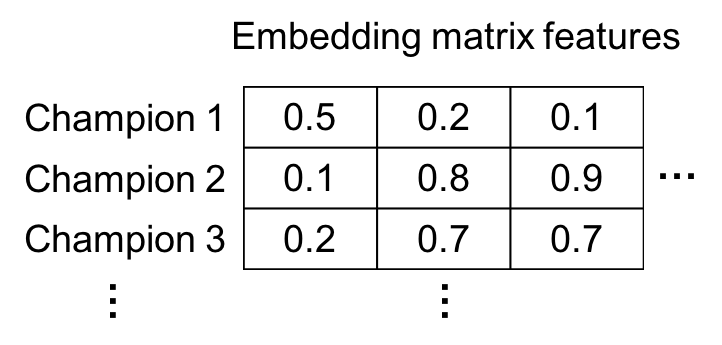

Network architecture
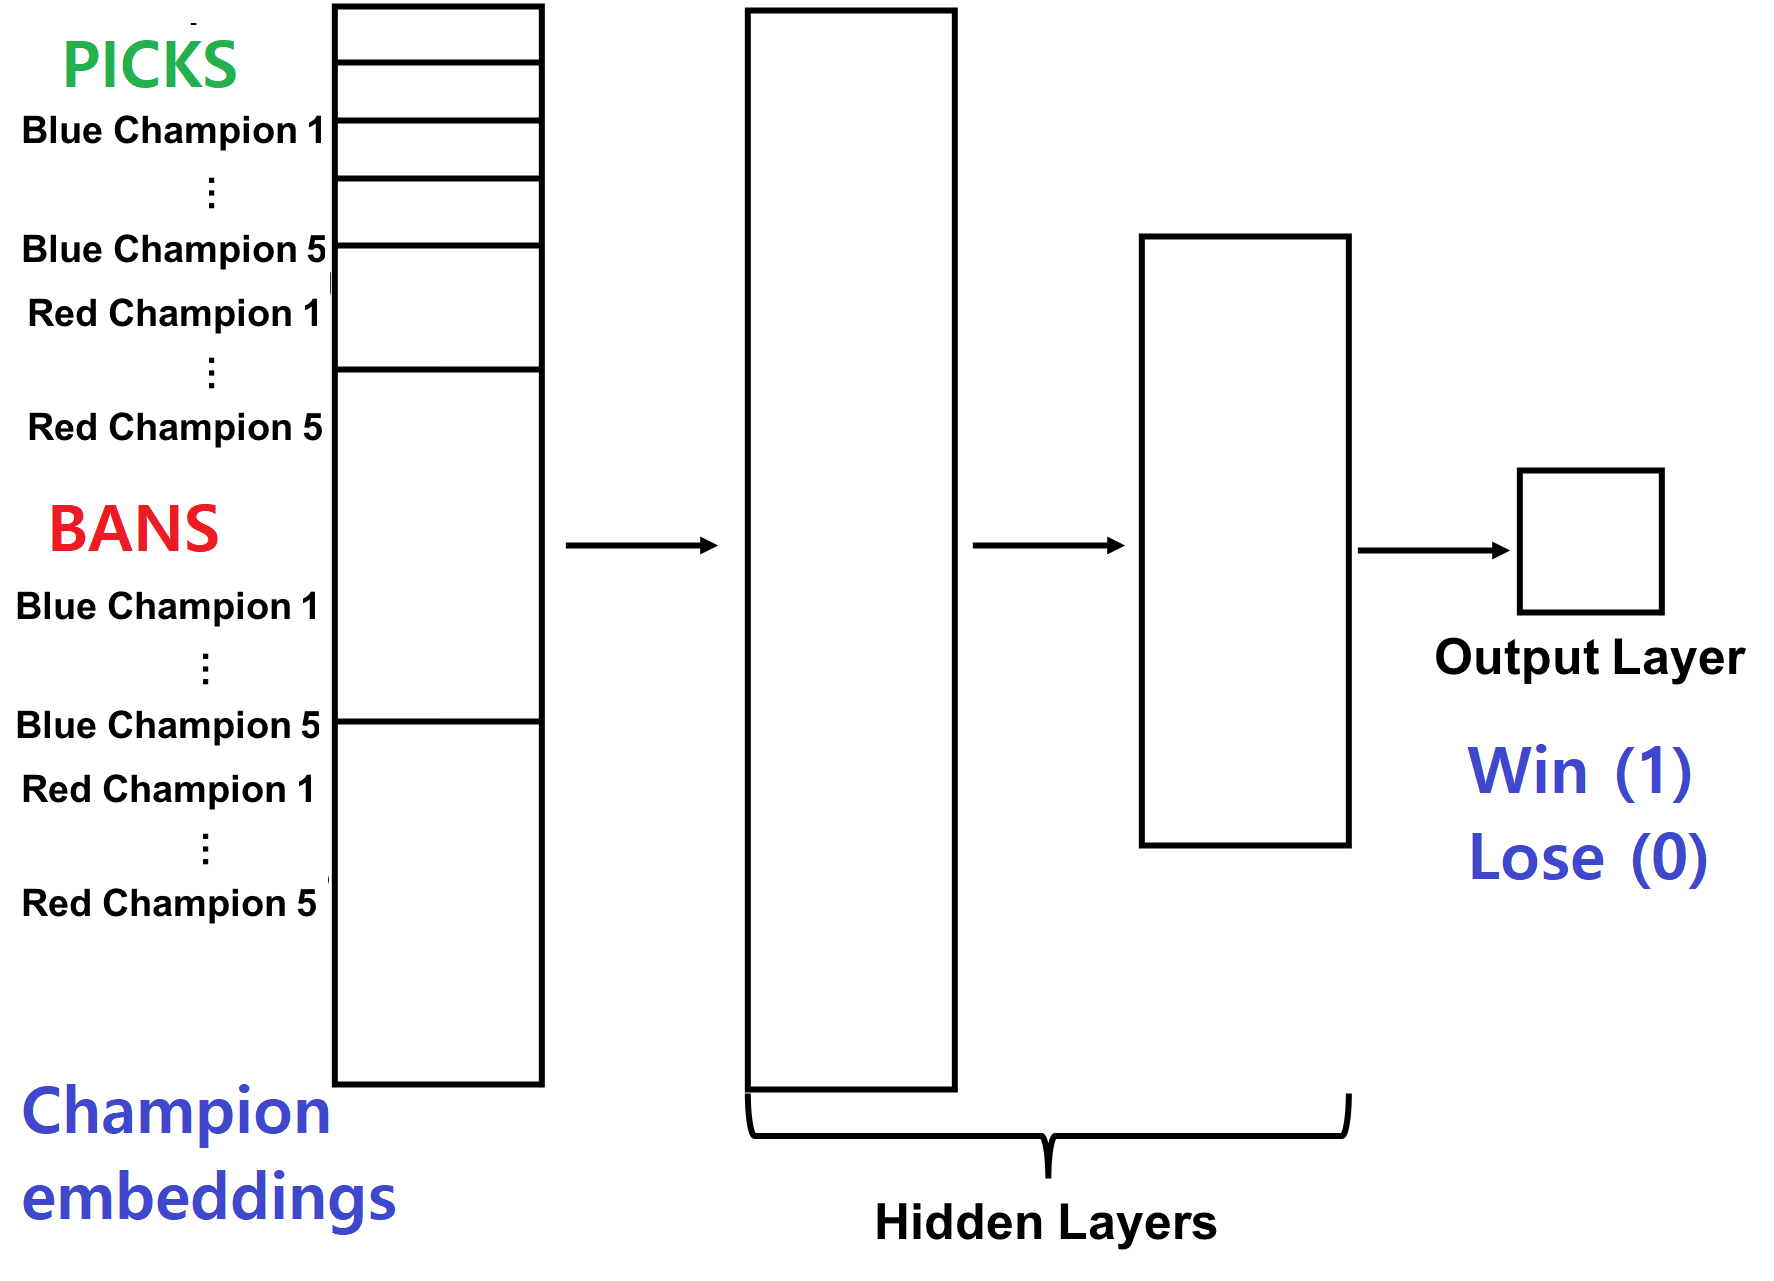

Important concepts:

    Categorical embeddings: Similar to latent features, embedding categories into N-dimensional features.
    Hidden layers
    Output Hidden layer



In [1]:
import numpy as np
import pandas as pd

In [56]:
# data downloaded from https://www.kaggle.com/datasnaek/league-of-legends
path ='./games.csv'

data = pd.read_csv(path)
df = pd.DataFrame(data)

In [57]:
# data frame with champion selections / bans for ~50000 ranked matches
df = df[['winner', 
         't1_champ1id','t1_champ2id','t1_champ3id','t1_champ4id','t1_champ5id',
         't2_champ1id','t2_champ2id','t2_champ3id','t2_champ4id','t2_champ5id',
         't1_ban1','t1_ban2','t1_ban3','t1_ban4','t1_ban5',
         't2_ban1','t2_ban2','t2_ban3','t2_ban4','t2_ban5']]
df.head()

,winner,t1_champ1id,t1_champ2id,t1_champ3id,t1_champ4id,t1_champ5id,t2_champ1id,t2_champ2id,t2_champ3id,t2_champ4id,...,t1_ban1,t1_ban2,t1_ban3,t1_ban4,t1_ban5,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
0,1,8,432,96,11,112,104,498,122,238,...,92,40,69,119,141,114,67,43,16,51
1,1,119,39,76,10,35,54,25,120,157,...,51,122,17,498,19,11,67,238,51,420
2,1,18,141,267,68,38,69,412,126,24,...,117,40,29,16,53,157,238,121,57,28
3,1,57,63,29,61,36,90,19,412,92,...,238,67,516,114,31,164,18,141,40,51
4,1,19,29,40,119,134,37,59,141,38,...,90,64,412,25,31,86,11,201,122,18


In [58]:
# replacing 2s to 0s so that we have 1 for blue team winning and 0 for blue team losing.
df['winner'] = np.where(df['winner'] == 2, 0, df['winner'])
df

,winner,t1_champ1id,t1_champ2id,t1_champ3id,t1_champ4id,t1_champ5id,t2_champ1id,t2_champ2id,t2_champ3id,t2_champ4id,...,t1_ban1,t1_ban2,t1_ban3,t1_ban4,t1_ban5,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
0,1,8,432,96,11,112,104,498,122,238,...,92,40,69,119,141,114,67,43,16,51
1,1,119,39,76,10,35,54,25,120,157,...,51,122,17,498,19,11,67,238,51,420
2,1,18,141,267,68,38,69,412,126,24,...,117,40,29,16,53,157,238,121,57,28
3,1,57,63,29,61,36,90,19,412,92,...,238,67,516,114,31,164,18,141,40,51
4,1,19,29,40,119,134,37,59,141,38,...,90,64,412,25,31,86,11,201,122,18
5,1,40,141,24,45,67,92,15,245,2,...,117,6,238,122,105,119,134,154,63,31
6,1,74,17,412,18,57,53,21,114,161,...,157,11,141,32,35,75,42,31,40,429
7,1,150,498,16,90,79,112,64,497,67,...,117,19,157,29,18,157,38,122,40,238
8,0,111,57,18,267,161,29,59,99,141,...,154,117,31,126,157,28,51,53,157,40
9,0,427,11,75,429,131,35,110,74,99,...,31,238,141,17,119,64,141,84,67,53


In [59]:
print("total matches : ",len(df))
print("blue team won : ",len(df[df['winner']==1]))

total matches :  51490
blue team won :  26077


In [71]:
print("Null hypothesis : blue team win percentage :",26077/51490,"%")

Null hypothesis : blue team win percentage : 0.5064478539522237 %


In [61]:
# using fastai for training, it's used with pytorch
# https://docs.fast.ai/
# https://docs.fast.ai/tabular.html
# useful tutorial
# https://confusedcoders.com/data-science/deep-learning/how-to-apply-deep-learning-on-tabular-data-with-fastai

from fastai.tabular import * 

In [66]:
# preprocessing of data using fastai

procs = [Categorify, Normalize]
valid_idx = range(len(df)-20000, len(df)) # split train/test
dep_var = 'winner'
cat_names = ['t1_champ1id','t1_champ2id','t1_champ3id','t1_champ4id','t1_champ5id',
             't2_champ1id','t2_champ2id','t2_champ3id','t2_champ4id','t2_champ5id',
             't1_ban1','t1_ban2','t1_ban3','t1_ban4','t1_ban5',
             't2_ban1','t2_ban2','t2_ban3','t2_ban4','t2_ban5']

# Now we're ready to pass this information to TabularDataBunch.from_df to create the DataBunch that we'll use for training.
data = TabularDataBunch.from_df('.', df, dep_var, valid_idx=valid_idx, procs=procs, cat_names=cat_names)

In [67]:
# We can grab a mini-batch of data and take a look
(cat_x, _),y = next(iter(data.train_dl))
for o in (cat_x, _, y): print(to_np(o[:5]))

[[ 91 122  81 137 ...  41  62  98  50]
 [ 22  59   4  54 ...  54  97 100  80]
 [ 11 120  84 126 ...  50 139  26 124]
 [130  56  96  18 ...  88 114 111   4]
 [122  97 138  56 ...  62  26  61 124]]
[0 0 0 0 0]
[0 0 0 0 0]


In [68]:
data.show_batch(rows=10)

t1_champ1id,t1_champ2id,t1_champ3id,t1_champ4id,t1_champ5id,t2_champ1id,t2_champ2id,t2_champ3id,t2_champ4id,t2_champ5id,t1_ban1,t1_ban2,t1_ban3,t1_ban4,t1_ban5,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5,target
154,99,115,429,106,110,157,24,92,25,5,17,11,51,432,15,432,11,3,53,1
412,113,90,18,84,150,67,33,103,48,40,31,236,57,29,40,117,157,516,141,0
141,236,42,201,157,127,67,53,27,79,154,122,114,29,40,29,18,238,38,113,0
121,104,4,80,164,412,67,516,103,19,141,254,238,18,119,238,40,122,236,119,1
53,202,161,64,84,92,60,136,29,117,114,85,157,154,3,121,51,54,58,119,1
101,18,432,28,3,122,64,236,43,38,37,113,40,157,103,16,37,40,24,117,1
16,22,82,32,48,120,3,38,497,18,36,31,238,40,154,157,113,122,141,238,1
222,98,78,14,99,67,154,134,201,122,143,90,11,53,157,238,64,115,412,79,0
22,55,412,421,54,19,90,26,39,29,122,11,154,105,164,51,154,80,23,157,1
41,29,53,8,203,61,51,497,83,75,31,412,57,238,6,33,122,141,119,31,1


In [46]:
import json

# read file
with open('champion_info.json', 'r') as myfile:
    data=myfile.read()

# parse file
obj = json.loads(data)

# show number of characters
print(str(obj['data']))
print(len(obj['data'].keys()))


{'1': {'title': 'the Dark Child', 'id': 1, 'key': 'Annie', 'name': 'Annie'}, '2': {'title': 'the Berserker', 'id': 2, 'key': 'Olaf', 'name': 'Olaf'}, '3': {'title': 'the Colossus', 'id': 3, 'key': 'Galio', 'name': 'Galio'}, '4': {'title': 'the Card Master', 'id': 4, 'key': 'TwistedFate', 'name': 'Twisted Fate'}, '5': {'title': 'the Seneschal of Demacia', 'id': 5, 'key': 'XinZhao', 'name': 'Xin Zhao'}, '6': {'title': 'the Dreadnought', 'id': 6, 'key': 'Urgot', 'name': 'Urgot'}, '7': {'title': 'the Deceiver', 'id': 7, 'key': 'Leblanc', 'name': 'LeBlanc'}, '8': {'title': 'the Crimson Reaper', 'id': 8, 'key': 'Vladimir', 'name': 'Vladimir'}, '9': {'title': 'the Harbinger of Doom', 'id': 9, 'key': 'Fiddlesticks', 'name': 'Fiddlesticks'}, '10': {'title': 'The Judicator', 'id': 10, 'key': 'Kayle', 'name': 'Kayle'}, '11': {'title': 'the Wuju Bladesman', 'id': 11, 'key': 'MasterYi', 'name': 'Master Yi'}, '12': {'title': 'the Minotaur', 'id': 12, 'key': 'Alistar', 'name': 'Alistar'}, '13': {'tit


138


In [69]:
learn = tabular_learner(data, layers=[200,100], metrics=accuracy, emb_drop=0.1, callback_fns=ShowGraph)

# select the appropriate learning rate
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


epoch,train_loss,valid_loss,accuracy,time
0,0.708290,0.705181,0.515950,00:53
1,0.689721,0.706283,0.514250,00:53
2,0.680527,0.713537,0.522700,00:52
3,0.669450,0.721212,0.512700,00:53
4,0.638714,0.747434,0.516650,00:52
5,0.588605,0.793449,0.513150,00:54
6,0.509436,0.913293,0.514350,00:53
7,0.415999,1.030710,0.521150,00:52
8,0.327929,1.222202,0.519250,00:52
9,0.236298,1.391506,0.520800,00:53


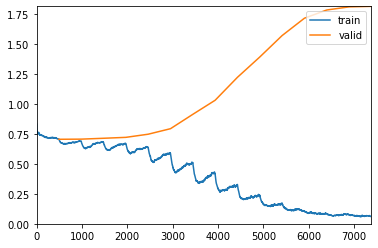

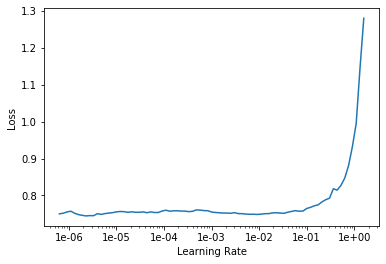

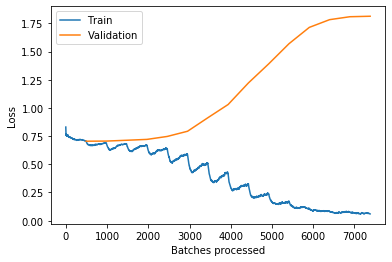

In [70]:
# we typically find the point where the slope is steepest
learn.recorder.plot()

# Fit the model based on selected learning rate
learn.fit_one_cycle(15, max_lr=slice(1e-03))

# Analyse our model
learn.model
learn.recorder.plot_losses()

We have a clearly overfitting model with roughly 52% accuracy for predicting the winner, which is only 2% better than randomly guessing :(

So I'm going to try to apply the following techniques to try avoid over fitting.

    Weight decay
    Dropout
    Batch normalisation

epoch,train_loss,valid_loss,accuracy,time
0,0.708825,0.698736,0.506462,00:43
1,0.694909,0.711761,0.515115,00:43
2,0.695593,0.705561,0.515692,00:43
3,0.685207,0.703874,0.517692,00:43
4,0.674127,0.697145,0.514615,00:42
5,0.663367,0.704225,0.515423,00:42
6,0.650306,0.743891,0.518000,00:42
7,0.630954,0.750538,0.514385,00:42
8,0.599431,0.791912,0.512885,00:43
9,0.549585,0.851270,0.512231,00:41


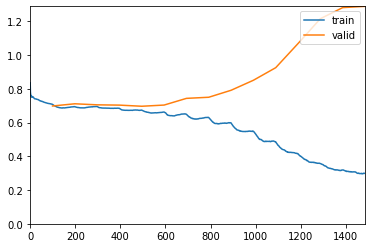

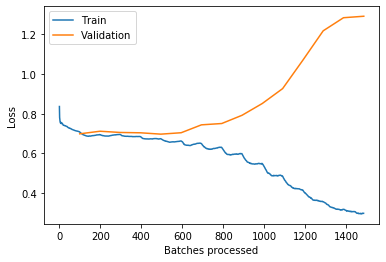

In [75]:
procs = [Categorify]
valid_idx = range(len(df)-26000, len(df)) # split train/test
dep_var = 'winner'
cat_names = ['t1_champ1id','t1_champ2id','t1_champ3id','t1_champ4id','t1_champ5id',
             't2_champ1id','t2_champ2id','t2_champ3id','t2_champ4id','t2_champ5id',
             't1_ban1','t1_ban2','t1_ban3','t1_ban4','t1_ban5',
             't2_ban1','t2_ban2','t2_ban3','t2_ban4','t2_ban5']

BATCH_SIZE = 256

# Now we're ready to pass this information to TabularDataBunch.from_df to create the DataBunch that we'll use for training.
data = TabularDataBunch.from_df('.', df, dep_var, bs=BATCH_SIZE, valid_idx=valid_idx, procs=procs, cat_names=cat_names)



learn = tabular_learner(data, layers=[200,100], metrics=accuracy, emb_drop=0.3, use_bn=True, callback_fns=ShowGraph)
# select the appropriate learning rate
# we typically find the point where the slope is steepest
# learn.recorder.plot()

# Fit the model based on selected learning rate
learn.fit_one_cycle(15, 0.02)

# Analyse our model
learn.model
learn.recorder.plot_losses()

epoch,train_loss,valid_loss,accuracy,time
0,0.721193,0.701452,0.508231,00:42
1,0.692503,0.697247,0.509231,00:42
2,0.687560,0.693483,0.519692,00:42
3,0.681794,0.697520,0.521154,00:42
4,0.676840,0.700709,0.523500,00:42
5,0.669048,0.700312,0.516000,00:41
6,0.659097,0.714486,0.517500,00:41
7,0.646478,0.712201,0.516192,00:42
8,0.625601,0.744985,0.516692,00:41
9,0.603752,0.761563,0.515692,00:41


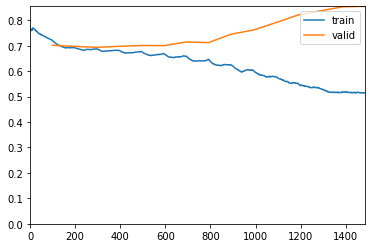

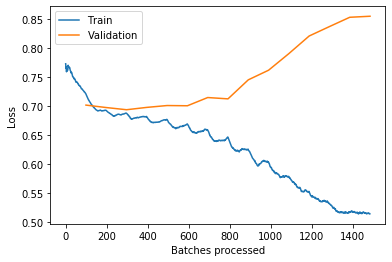

In [76]:
procs = [Categorify]
valid_idx = range(len(df)-26000, len(df)) # split train/test
dep_var = 'winner'
cat_names = ['t1_champ1id','t1_champ2id','t1_champ3id','t1_champ4id','t1_champ5id',
             't2_champ1id','t2_champ2id','t2_champ3id','t2_champ4id','t2_champ5id',
             't1_ban1','t1_ban2','t1_ban3','t1_ban4','t1_ban5',
             't2_ban1','t2_ban2','t2_ban3','t2_ban4','t2_ban5']

BATCH_SIZE = 256

# Now we're ready to pass this information to TabularDataBunch.from_df to create the DataBunch that we'll use for training.
data = TabularDataBunch.from_df('.', df, dep_var, bs=BATCH_SIZE, valid_idx=valid_idx, procs=procs, cat_names=cat_names)



learn = tabular_learner(data, layers=[50,10], metrics=accuracy, emb_drop=0.5, use_bn=True, callback_fns=ShowGraph)
# select the appropriate learning rate
# we typically find the point where the slope is steepest
# learn.recorder.plot()

# Fit the model based on selected learning rate
learn.fit_one_cycle(15, 0.01)

# Analyse our model
learn.model
learn.recorder.plot_losses()